<a href="https://colab.research.google.com/github/Roshan2002-prog/FeedForwardNeuralNetwork/blob/main/Full%20and%20Completed%20hosuing%20PricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [6]:
X = df.drop(columns = ['median_house_value','ocean_proximity'])
y = df['median_house_value']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Starting to build the FNN Model

In [14]:
model = Sequential([
    Dense(128, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(1)
])

#Compile them all
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, validation_split = 0.2)

Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 55209451520.0000 - mae: 204285.5156 - val_loss: 25058594816.0000 - val_mae: 123300.7266
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 16214454272.0000 - mae: 94572.4531 - val_loss: 10184738816.0000 - val_mae: 72535.7188
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 9120362496.0000 - mae: 69201.1094 - val_loss: 7963945984.0000 - val_mae: 63776.5664
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7381170176.0000 - mae: 61540.0195 - val_loss: 6662180352.0000 - val_mae: 58797.6602
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6202889216.0000 - mae: 57019.7500 - val_loss: 5816204288.0000 - val_mae: 54904.4297
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 5442355712.0000 - mae: 53539.4805 - val_loss: 5322797056.0000 - val_mae: 53119.4727
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 5056079360.0000 - mae: 51407.8828 - val_loss: 5043334656.0000 -

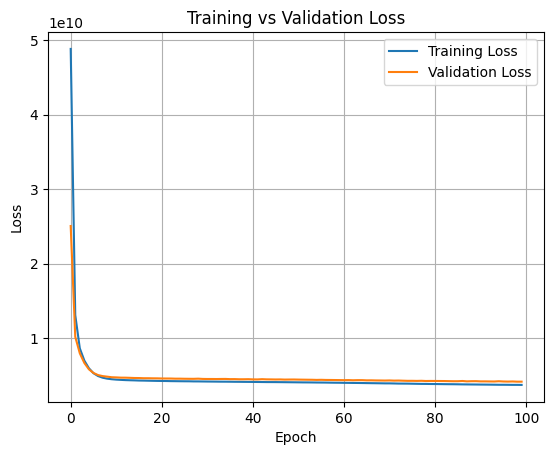

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()